 # Exploratory Data Analysis (EDA) & Preprocessing

## Loaded Dataset and understood dataset structure

In [1]:
import pandas as pd

df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Cleaning
We convert TotalCharges to numeric:

In [2]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Now we drop the missing values

In [3]:
df.dropna(inplace=True)

Now we drop the irrelevant columns

In [4]:
df.drop(['customerID'], axis=1, inplace=True)

## Exploratory Data Analysis (Visuals)

C:\Users\anany\AppData\Local\Temp\ipykernel_4240\427161954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


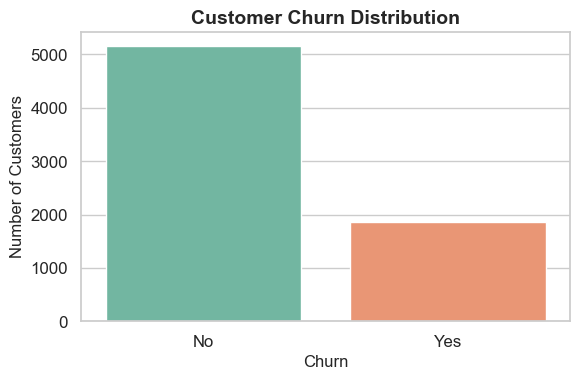

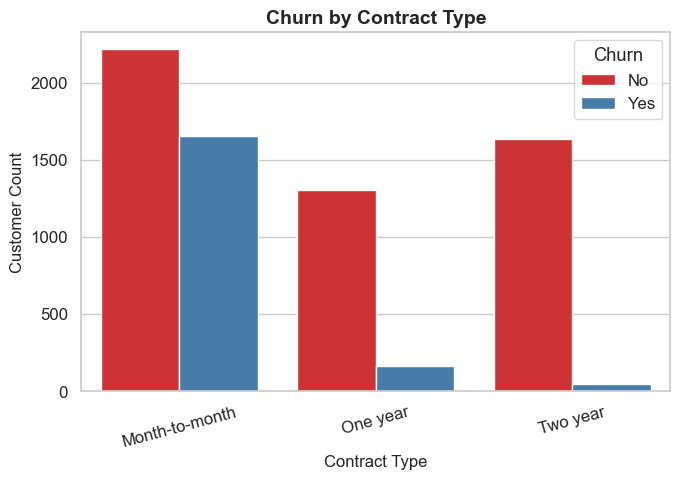

C:\Users\anany\AppData\Local\Temp\ipykernel_4240\427161954.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='coolwarm')


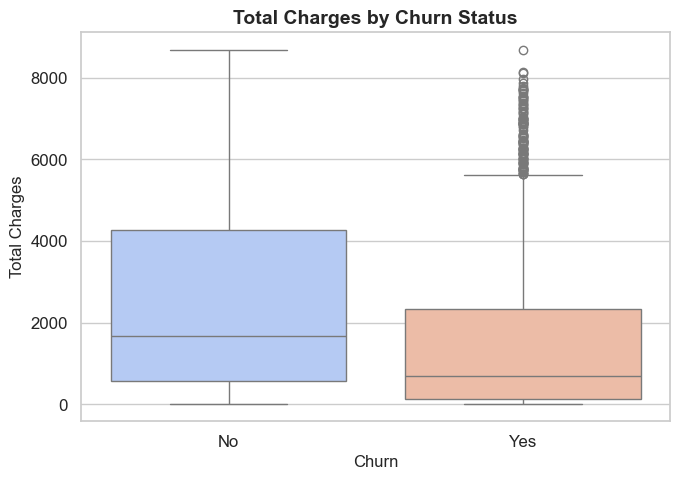

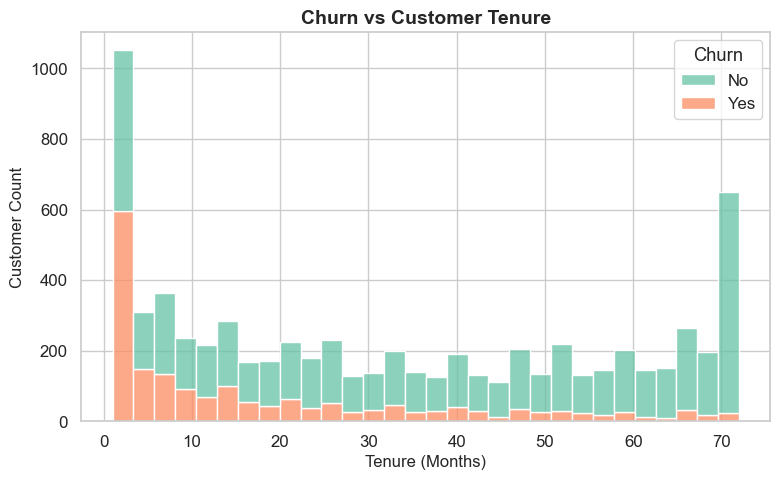

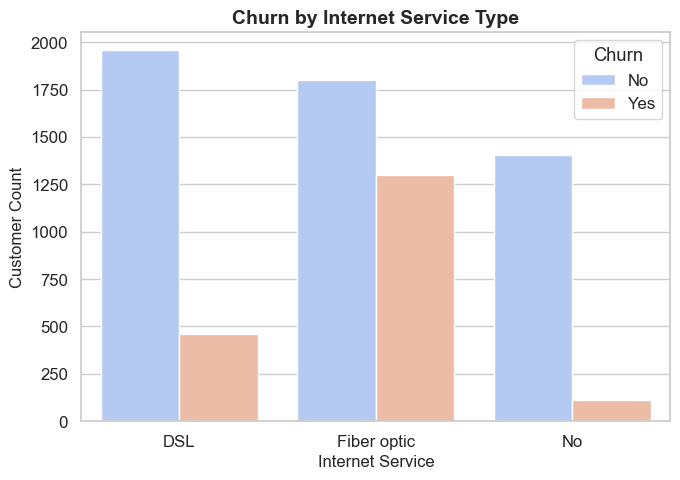

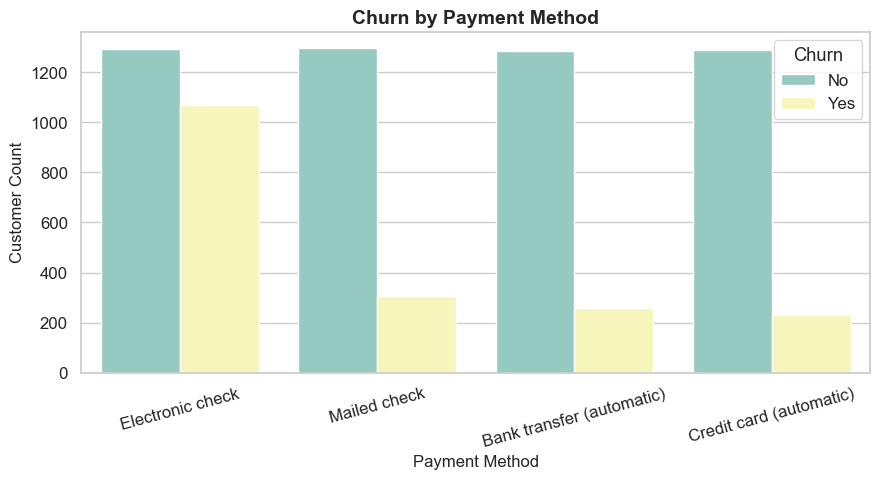

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using a clean style
# Churn Distribution
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Customer Churn Distribution", fontsize=14, weight='bold')
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.tight_layout()
plt.show()

# Contract Type vs Churn
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title("Churn by Contract Type", fontsize=14, weight='bold')
plt.xlabel("Contract Type", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.legend(title="Churn", loc='upper right')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Total Charges by Churn Status
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='coolwarm')
plt.title("Total Charges by Churn Status", fontsize=14, weight='bold')
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Total Charges", fontsize=12)
plt.tight_layout()
plt.show()

# Churn vs Tenure (Loyalty Duration)
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette='Set2')
plt.title("Churn vs Customer Tenure", fontsize=14, weight='bold')
plt.xlabel("Tenure (Months)", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.tight_layout()
plt.show()

#  Churn by Internet Service Type
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='coolwarm')
plt.title("Churn by Internet Service Type", fontsize=14, weight='bold')
plt.xlabel("Internet Service", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.legend(title="Churn", loc='upper right')
plt.tight_layout()
plt.show()

#  Churn by Payment Method
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set3')
plt.title("Churn by Payment Method", fontsize=14, weight='bold')
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


- Customers with month-to-month contracts churn significantly more.
- Indicates short-term customers are less loyal.
- Churned customers generally have lower lifetime value (TotalCharges).
- Most churned customers leave within the first 12–24 months.
- Shows a clear retention cliff in early months.
- Customers with Fiber optic are more likely to churn.
- Those with No internet service almost never churn — makes sense.
- Customers using Electronic Check churn the most.
- Bank transfer and mailed checks are more stable.

## Feature Encoding
Splitting features and label:

In [6]:
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})  # Encode target

In [7]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
binary_cols = [col for col in X.columns if X[col].nunique() == 2]

# Label encode binary columns
le = LabelEncoder()
for col in binary_cols:
    X_encoded[col] = le.fit_transform(X[col])

# One-hot encode other categoricals
X_encoded = pd.get_dummies(X_encoded, drop_first=True)

## Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

## EDA & Preprocessing Summary:
- Cleaned missing or incorrect values

- Converted all features to machine-readable form

- Split data into training and testing sets

## Summary of EDA Insights

| **Variable**        | **Insight**                                                                 |
|---------------------|------------------------------------------------------------------------------|
| `Churn`             | ~26% of customers leave → apply class balancing techniques like SMOTE       |
| `Contract`          | Month-to-month contracts show the highest churn rates                        |
| `Tenure`            | Majority of churners leave within the first 1–2 years                        |
| `TotalCharges`      | Lower total charges correlate with higher churn                              |
| `InternetService`   | Customers using fiber optic churn the most                                   |
| `PaymentMethod`     | Electronic check users have the highest churn probability                    |


## Train Multiple Models
We'll test 3:
- Logistic Regression (baseline)
- Random Forest (robust, explainable)
- XGBoost (high performance)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

D:\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression ---
Accuracy: 0.7420042643923241
ROC AUC: 0.7074547939390489
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1033
           1       0.51      0.63      0.57       374

    accuracy                           0.74      1407
   macro avg       0.68      0.71      0.69      1407
weighted avg       0.76      0.74      0.75      1407

Confusion Matrix:
 [[807 226]
 [137 237]]

--- Random Forest ---
Accuracy: 0.7732764747690121
ROC AUC: 0.7176646598091846
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.57      0.60      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.78      1407

Confusion Matrix:
 [[864 169]
 [150 224]]

--- XGBoost ---
Accuracy: 0.759772565742715
ROC AUC: 0.7024980457729163
              precision

D:\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:31:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [12]:
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=10, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1
)

rf_random.fit(X_train_resampled, y_train_resampled)
best_rf = rf_random.best_estimator_

from sklearn.model_selection import GridSearchCV

xgb_params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 10],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=xgb_params,
    scoring='roc_auc',
    cv=3, verbose=1, n_jobs=-1
)

xgb_grid.fit(X_train_resampled, y_train_resampled)
best_xgb = xgb_grid.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits


D:\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:31:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Feature Importance (for best model)

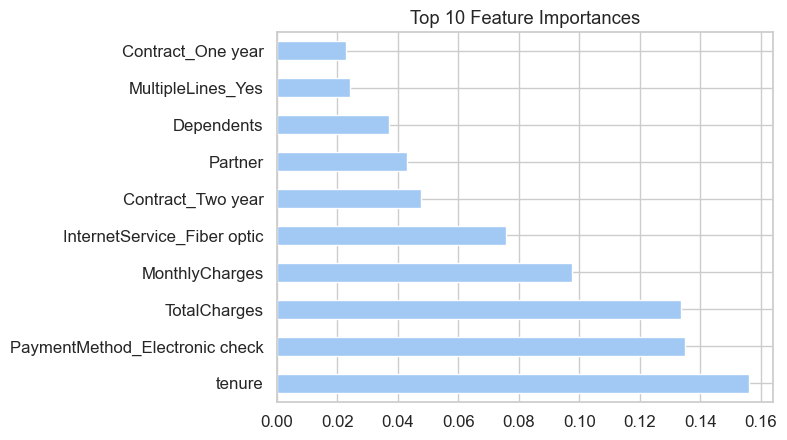

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

importances = best_rf.feature_importances_
feat_names = X_encoded.columns

feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

In [14]:
best_model = models["Random Forest"]

## Save the Best Model

In [15]:
import joblib
joblib.dump(best_model, "app/churn_model.pkl")

['app/churn_model.pkl']